In [1]:
print('This is college event feedback form analysis')


This is college event feedback form analysis


In [4]:
import pandas as pd

df = pd.read_csv("College_event_form.csv")
df.head()
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()
rating_map = {
    "poor": 1,
    "average": 2,
    "good": 3,
    "very good": 4,
    "excellent": 5
}

df["rating_score"] = df["give_your_feedback_as_ratings"].str.lower().map(rating_map)
df.head()



,timestamp,event_name,give_your_feedback_as_ratings,please_give_your_feedback_in_2-3_lines,rating_score,sentiment_analysis
0,2026/01/12 7:20:26 pm GMT+5:30,Tech fest 2024,good,"""The event was very well organized and informa...",3,Neutral
1,2026/01/12 7:23:31 pm GMT+5:30,AI workshop,average,"""Good event but the sessions felt a bit long""",2,Negative
2,2026/01/12 7:24:54 pm GMT+5:30,Tech fest 2024,Excellent,Excellent speakers and very engaging sessions.,5,Positive
3,2026/01/12 7:25:44 pm GMT+5:30,Tech fest 2024,poor,"""Poor management, timings were not followed pr...",1,Negative
4,2026/01/12 7:26:39 pm GMT+5:30,AI workshop,Excellent,"""Excellent speakers and very engaging sessions""",5,Positive


In [5]:
avg_rating = df.groupby("event_name")["rating_score"].mean().reset_index()
avg_rating




,event_name,rating_score
0,AI workshop,4.0
1,Cultural Fest,4.5
2,Tech fest 2024,3.6


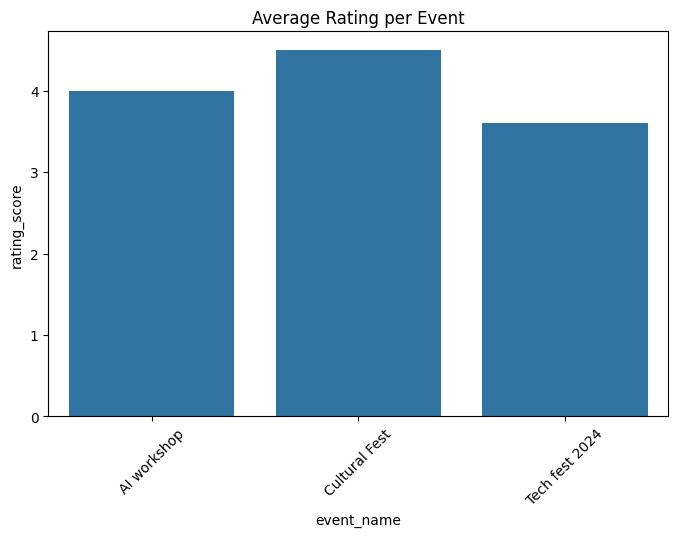

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=avg_rating, x="event_name", y="rating_score")
plt.xticks(rotation=45)
plt.title("Average Rating per Event")
plt.show()


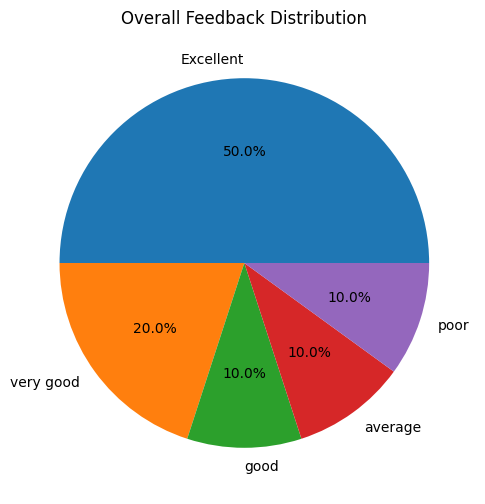

In [7]:
plt.figure(figsize=(6,6))
df["give_your_feedback_as_ratings"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Overall Feedback Distribution")
plt.ylabel("")
plt.show()


In [8]:
df["sentiment"] = df["rating_score"].apply(
    lambda x: "Positive" if x >= 4 else "Neutral" if x == 3 else "Negative"
)

df["sentiment"].value_counts()


sentiment
Positive    7
Negative    2
Neutral     1
Name: count, dtype: int64

In [9]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_feedback"] = df["please_give_your_feedback_in_2-3_lines"].apply(clean_text)
df[["clean_feedback"]].head()


,clean_feedback
0,the event was very well organized and informative
1,good event but the sessions felt a bit long
2,excellent speakers and very engaging sessions
3,poor management timings were not followed prop...
4,excellent speakers and very engaging sessions


In [10]:
df["tokens"] = df["clean_feedback"].apply(lambda x: x.split())
df[["tokens"]].head()



,tokens
0,"[the, event, was, very, well, organized, and, ..."
1,"[good, event, but, the, sessions, felt, a, bit..."
2,"[excellent, speakers, and, very, engaging, ses..."
3,"[poor, management, timings, were, not, followe..."
4,"[excellent, speakers, and, very, engaging, ses..."


In [11]:
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 1.7 MB/s eta 0:00:001.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.2 MB/s eta 0:00:002.3 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [12]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_feedback"].apply(get_sentiment)
df[["clean_feedback", "sentiment"]].head()


,clean_feedback,sentiment
0,the event was very well organized and informative,Positive
1,good event but the sessions felt a bit long,Positive
2,excellent speakers and very engaging sessions,Positive
3,poor management timings were not followed prop...,Negative
4,excellent speakers and very engaging sessions,Positive


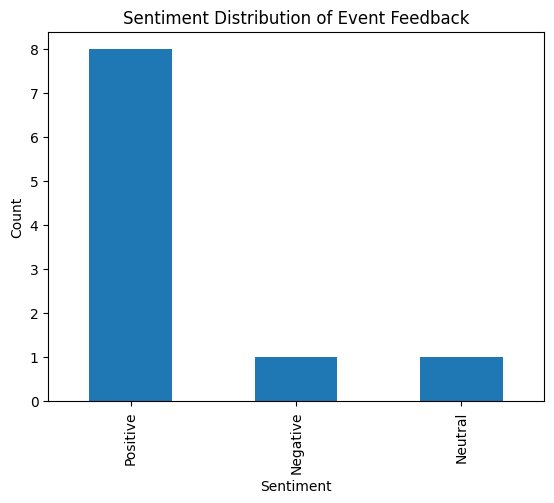

In [13]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution of Event Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [14]:
from collections import Counter

all_words = " ".join(df["clean_feedback"]).split()
word_freq = Counter(all_words)

word_freq.most_common(10)


[('and', 8),
 ('very', 7),
 ('sessions', 6),
 ('excellent', 5),
 ('speakers', 5),
 ('engaging', 5),
 ('the', 4),
 ('event', 4),
 ('was', 3),
 ('well', 3)]